In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy.interpolate as spi

In [2]:
D = 3
N = 1e8
volume_points = 0
volume_radii = 200
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 6) for tnn in true_nlist]

s = 1.0
sclist = [0.1, 0.5, 1.0]
sclist = [1.0]
L = 1.0
res_dir = 'nsc-volume'
randix = 0
n_perms = 10

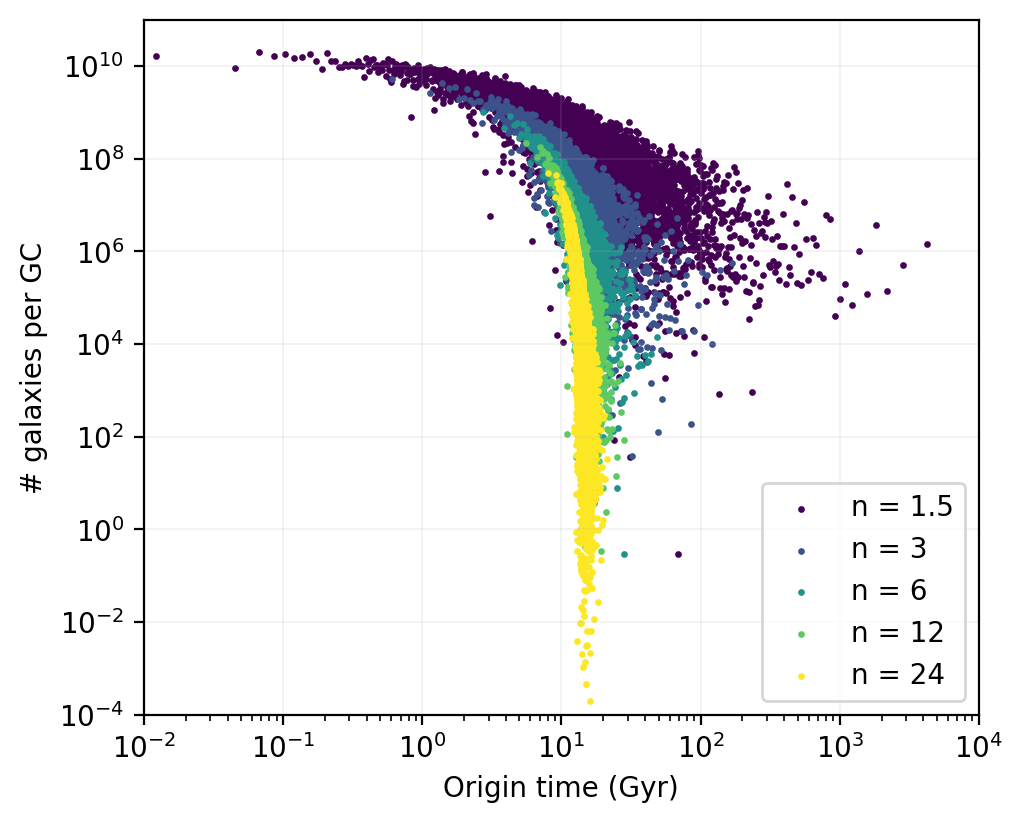

In [6]:
plt.rcParams['figure.constrained_layout.use'] = True
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
interp_bins = np.geomspace(1e-5, 100, int(1e6))
fig = plt.figure(figsize=(5,4),dpi=200)
leg = []
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        if true_n in [3,6]:
            n_perms = 10
        elif true_n in [12]:
            n_perms = 3
        elif true_n in [1.5, 24]:
            n_perms = 1
        if true_n == 24:
            volume_radii = 50
        else:
            volume_radii = 200
        interp_counts = np.zeros((n_perms, interp_bins.shape[0]))
        n_perms = 1
        for randix in range(0, n_perms):
            fout = (
                f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}_"
                f"v={volume_points}_V={volume_radii}"
            )
            res = pd.read_csv(fout+'_civs.csv')
            #print(res.shape[0])
            res['VolumeMax'] = pd.concat([res.VolumeRadii, res.VolumePoints], axis=1).max(axis=1)
            res_years = pd.read_csv(fout+'_years.csv')
            tau = res_years.OriginTime.median() # median origin proper-time
            
            G = 2e6*np.power(13.8*s/c*tau,3)
            C = res.shape[0]
            myData = G / ((np.arange(1,C+1)/C)*C) * res.VolumeRadii 
            T50 = res.OriginTime.median() # median origin model-time
            G = 2e6*pow(13.8/T50, 3)*pow(c/s, 3)
            myData = res.VolumeRadii * G
            leg.append(f"n = {true_n}")
            plt.scatter(res_years.OriginTime, myData, s=2, c=mycols[nix,:].reshape(1, -1));

plt.gca().set_xscale('log');
plt.gca().set_yscale('log');
plt.gca().set_xlabel('Origin time (Gyr)');
plt.gca().set_ylabel('# galaxies per GC');
plt.legend(leg, loc='lower right');
plt.grid(linewidth=0.1);
plt.gca().set_ylim(1e-4, 1e+11)
plt.gca().set_xlim(1e-2, 1e+4)
fig.savefig('figures-friday/plotOriginVsVolume.png', dpi=200);

5161118229300.096
239432915905.24164
35169933617.08427
12491257616.053162
7576912312.514369


<ipython-input-14-10a9d68fe552>:54: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.gca().set_xlim(0, 1)


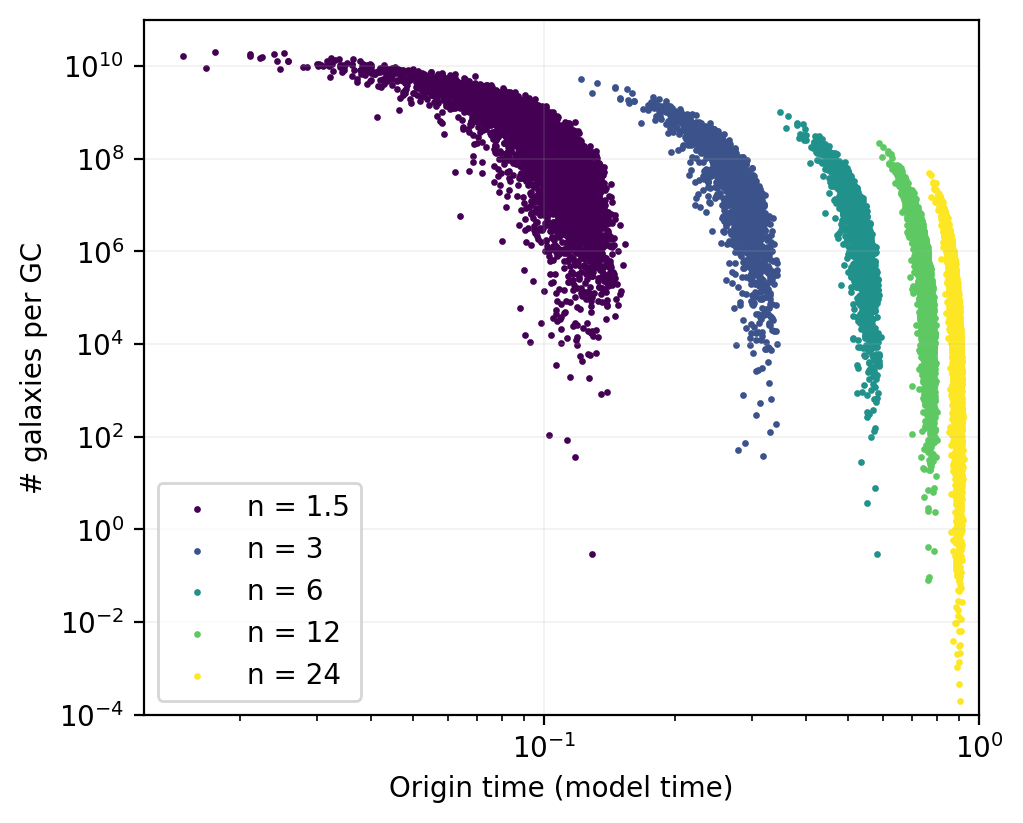

In [14]:
plt.rcParams['figure.constrained_layout.use'] = True
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
interp_bins = np.geomspace(1e-5, 100, int(1e6))
fig = plt.figure(figsize=(5,4),dpi=200)
leg = []
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        if true_n in [3,6]:
            n_perms = 10
        elif true_n in [12]:
            n_perms = 3
        elif true_n in [1.5, 24]:
            n_perms = 1
        if true_n == 24:
            volume_radii = 50
        else:
            volume_radii = 200
        interp_counts = np.zeros((n_perms, interp_bins.shape[0]))
        n_perms = 1
        for randix in range(0, n_perms):
            fout = (
                f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}_"
                f"v={volume_points}_V={volume_radii}"
            )
            res = pd.read_csv(fout+'_civs.csv')
            #print(res.shape[0])
            res['VolumeMax'] = pd.concat([res.VolumeRadii, res.VolumePoints], axis=1).max(axis=1)
            res_years = pd.read_csv(fout+'_years.csv')
            tau = res_years.OriginTime.median() # median origin proper-time
            
            G = 2e6*np.power(13.8*s/c*tau,3)
            C = res.shape[0]
            myData = G / ((np.arange(1,C+1)/C)*C) * res.VolumeRadii 
            T50 = res.OriginTime.median() # median origin model-time
            G = 2e6*pow(13.8/T50, 3)*pow(c/s, 3)
            print(G)
            myData = res.VolumeRadii * G
            leg.append(f"n = {true_n}")
            plt.scatter(res.OriginTime, myData, s=2, c=mycols[nix,:].reshape(1, -1));

plt.gca().set_xscale('log');
plt.gca().set_yscale('log');
plt.gca().set_xlabel('Origin time (model time)');
plt.gca().set_ylabel('# galaxies per GC');
plt.legend(leg, loc='lower left');
plt.grid(linewidth=0.1);
plt.gca().set_ylim(1e-4, 1e+11)
plt.gca().set_xlim(0, 1)
fig.savefig('figures-friday/plotOriginVsVolume-modeltime.png', dpi=200);

7966263484.954055
7966263484.954055
7966263484.954055
7966263484.954055
7966263484.954055


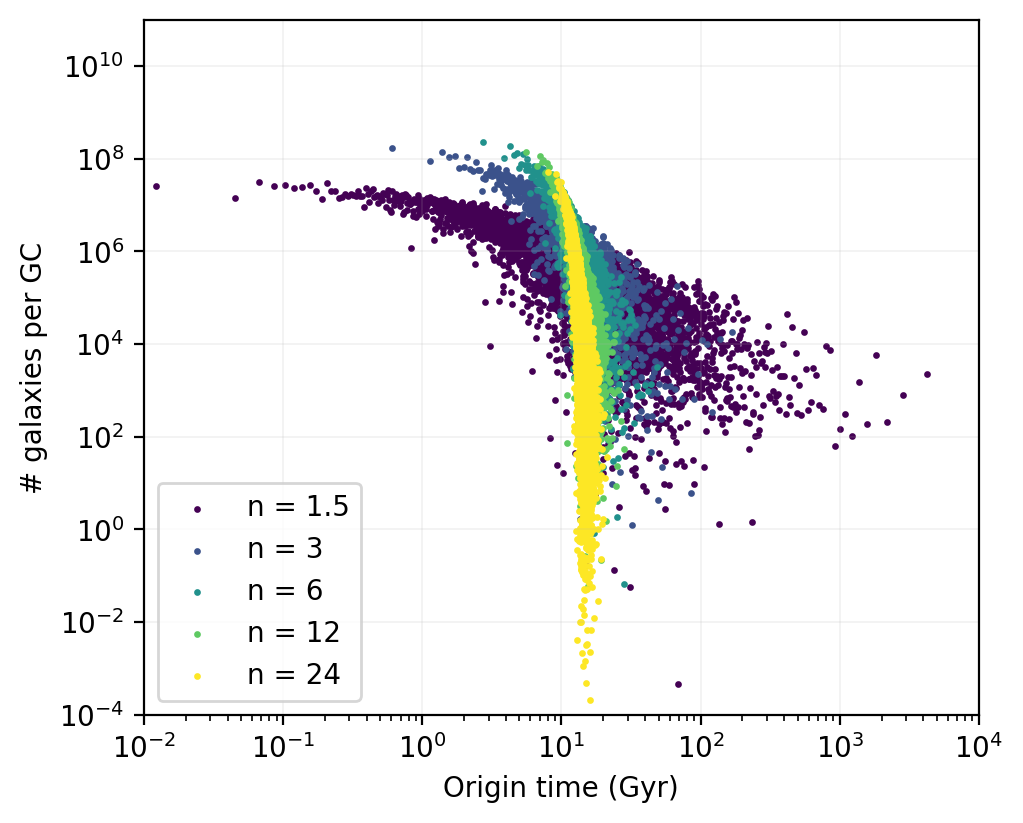

In [13]:
plt.rcParams['figure.constrained_layout.use'] = True
plot_data = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
interp_bins = np.geomspace(1e-5, 100, int(1e6))
fig = plt.figure(figsize=(5,4),dpi=200)
leg = []
allOriginTimes = []
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        if true_n in [3,6]:
            n_perms = 10
        elif true_n in [12]:
            n_perms = 3
        elif true_n in [1.5, 24]:
            n_perms = 1
        if true_n == 24:
            volume_radii = 50
        else:
            volume_radii = 200
        interp_counts = np.zeros((n_perms, interp_bins.shape[0]))
        n_perms = 1
        for randix in range(0, 1):
            fout = (
                f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}_"
                f"v={volume_points}_V={volume_radii}"
            )
            res = pd.read_csv(fout+'_civs.csv')
            allOriginTimes.append(res.OriginTime)
T50 = pd.concat(allOriginTimes, axis=0).median()
for sc in sclist:
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        if true_n in [3,6]:
            n_perms = 10
        elif true_n in [12]:
            n_perms = 3
        elif true_n in [1.5, 24]:
            n_perms = 1
        if true_n == 24:
            volume_radii = 50
        else:
            volume_radii = 200
        interp_counts = np.zeros((n_perms, interp_bins.shape[0]))
        n_perms = 1
        for randix in range(0, n_perms):
            fout = (
                f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}_"
                f"v={volume_points}_V={volume_radii}"
            )
            res = pd.read_csv(fout+'_civs.csv')
            #print(res.shape[0])
            res['VolumeMax'] = pd.concat([res.VolumeRadii, res.VolumePoints], axis=1).max(axis=1)
            res_years = pd.read_csv(fout+'_years.csv')
            tau = res_years.OriginTime.median() # median origin proper-time
            
            G = 2e6*np.power(13.8*s/c*tau,3)
            C = res.shape[0]
            myData = G / ((np.arange(1,C+1)/C)*C) * res.VolumeRadii 
            #T50 = res.OriginTime.median() # median origin model-time
            G = 2e6*pow(13.8/T50, 3)*pow(c/s, 3)
            print(G)
            myData = res.VolumeRadii * G
            leg.append(f"n = {true_n}")
            plt.scatter(res_years.OriginTime, myData, s=2, c=mycols[nix,:].reshape(1, -1));

plt.gca().set_xscale('log');
plt.gca().set_yscale('log');
plt.gca().set_xlabel('Origin time (Gyr)');
plt.gca().set_ylabel('# galaxies per GC');
plt.legend(leg, loc='lower left');
plt.grid(linewidth=0.1);
plt.gca().set_ylim(1e-4, 1e+11)
plt.gca().set_xlim(1e-2, 1e+4)
fig.savefig('figures-friday/plotOriginVsVolume-sameT50.png', dpi=200);